<a href="https://colab.research.google.com/github/taranaalex/MLPNS_ATarana/blob/main/ConvolutionalNN_inClass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras

In [7]:
plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams['image.interpolation'] = 'nearest' #imshow interpola le immagini in caso contrario
plt.rcParams['image.cmap'] = 'gist_gray' #tanto le immagini saranno in bianco/nero

In [8]:
cd /content/drive/MyDrive/MLPNS2023

/content/drive/MyDrive/MLPNS2023


In [9]:
ls

spm-20210427T111354Z-001.zip


In [10]:
!unzip spm-20210427T111354Z-001.zip

Archive:  spm-20210427T111354Z-001.zip
  inflating: spm/spm_struct_pos.npy  
  inflating: spm/spm_struct_neg.npy  
  inflating: spm/test_good_all.npy   
  inflating: spm/train_good_all.npy  
  inflating: spm/test_bad_all.npy    
  inflating: spm/train_bad_all.npy   


In [11]:
data = np.load('spm/train_good_all.npy')

In [13]:
data.shape

(1302, 64, 64)

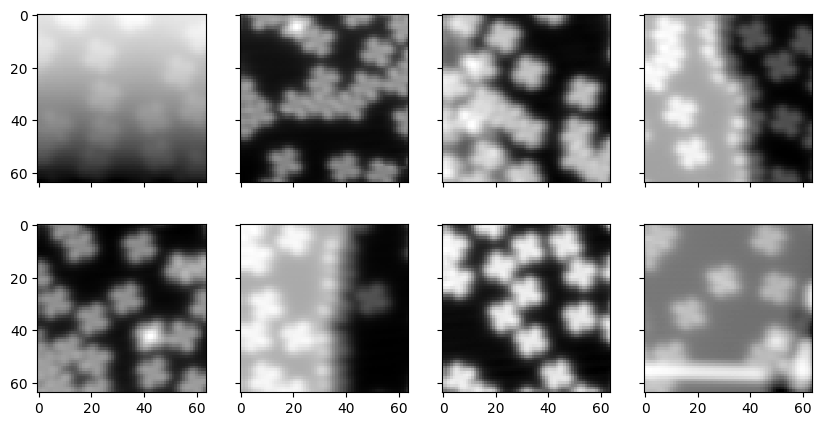

In [15]:
fig, ax = plt.subplots(2, 4, sharex=True, sharey=True, figsize=[10,5])
for ii in range(8):
  ax[ii // 4, ii % 4].imshow(data[ii])

In [18]:
plt.hist(data.value)

AttributeError: ignored

In [21]:
#Normalizzo i dati, così che vadano da 0 a 1, ma senza cambiare la distribuzione realtiva
norm = (data - data.min(axis=(1,2), keepdims=True)) / (data.max(axis=(1,2), keepdims=True) - 
                                                       data.min(axis=(1,2), keepdims=True))

In [22]:
norm.shape

(1302, 64, 64)

(array([412., 209.,  98.,  75.,  64.,  70.,  92., 120.,  88.,  74.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

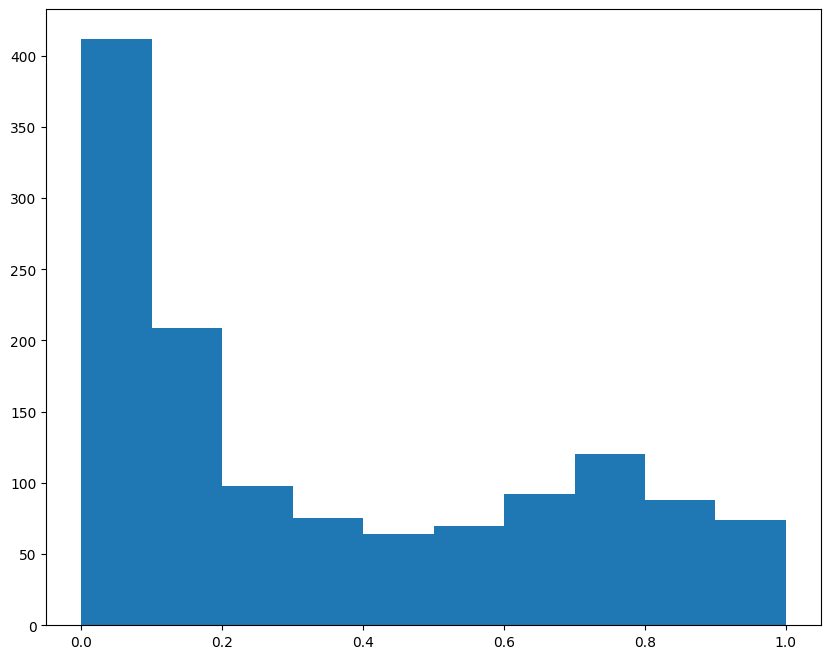

In [25]:
plt.hist(norm[:,0,0])

In [34]:
pos = np.load('spm/spm_struct_pos.npy') #posizioni in cui ho molecola
neg = np.load('spm/spm_struct_neg.npy') #posizioni in cui ho altro

Qui provo a capire come sono organizzati i dati:

In [27]:
pos.shape, neg.shape

((500, 3), (500, 3))

In [28]:
pos[0] #le posizioni su assi x ed y e il 'numero' delle immagini

array([30, 25, 51])

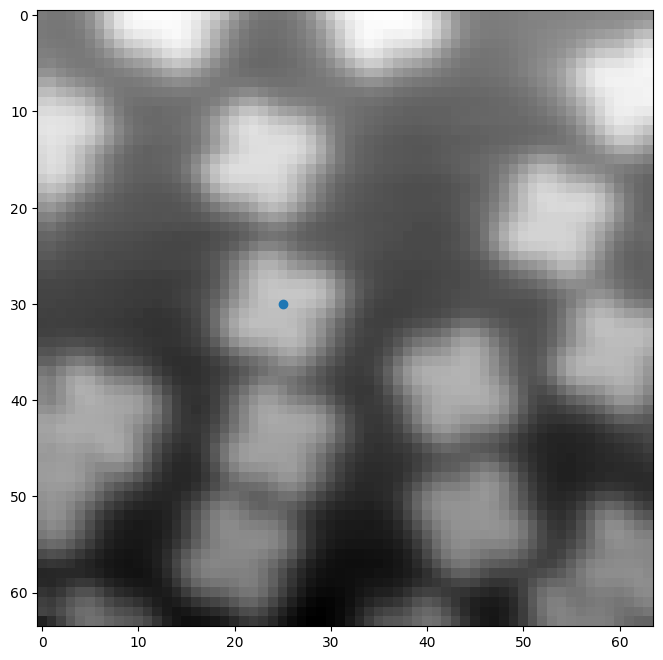

In [33]:
plt.imshow(norm[pos[0][2]])
plt.plot(pos[0][1], pos[0][0], 'o')

In [43]:
wid = 10 #iperparametro: mezzalunghezza del 'francobollo'
stmp_pos = []
for ii in range(pos.shape[0]):
  trow, tcol, tind = pos[ii]
  if (trow > wid) & (tcol > wid) & (trow < 64 - wid) & (tcol < 64 - wid) : #se il francobollo è più distante dal bordo che la mezza-distanza...
    stmp_pos.append(norm[tind, trow-wid:trow+wid, tcol-wid:tcol+wid])

stmp_pos = np.array(stmp_pos)

In [44]:
stmp_pos.shape

(389, 20, 20)

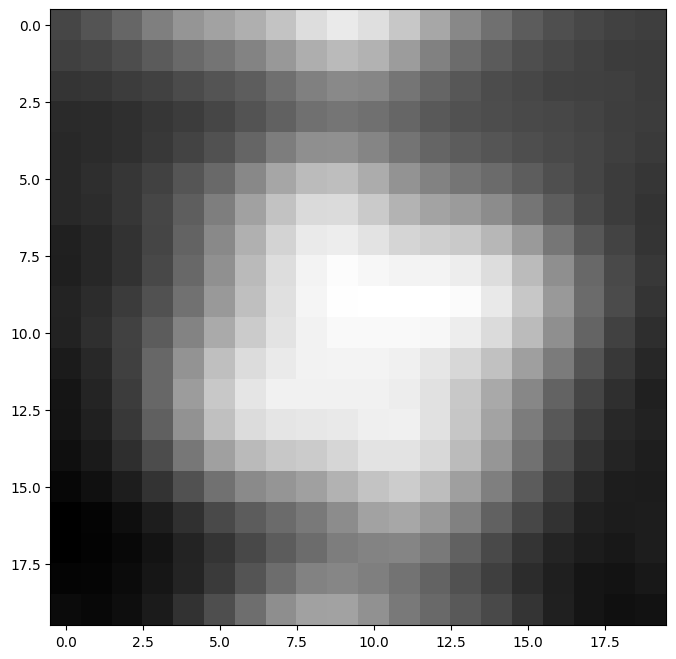

In [45]:
plt.imshow(stmp_pos[0])

In [47]:
wid = 10 #iperparametro: mezzalunghezza del 'francobollo'
stmp_neg = []
for ii in range(neg.shape[0]):
  trow, tcol, tind = neg[ii]
  if (trow > wid) & (tcol > wid) & (trow < 64 - wid) & (tcol < 64 - wid) : #se il francobollo è più distante dal bordo che la mezza-distanza...
    stmp_neg.append(norm[tind, trow-wid:trow+wid, tcol-wid:tcol+wid])

stmp_neg = np.array(stmp_neg)

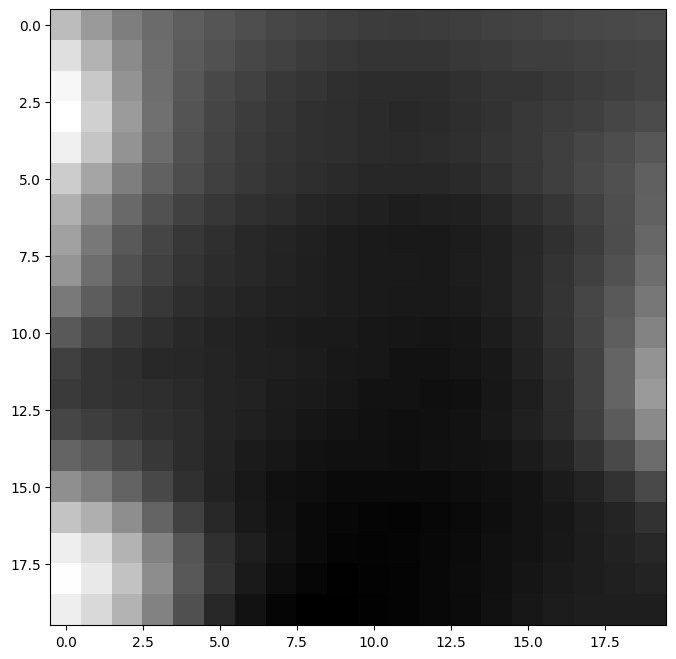

In [48]:
plt.imshow(stmp_neg[0])

Visualizzo il training set

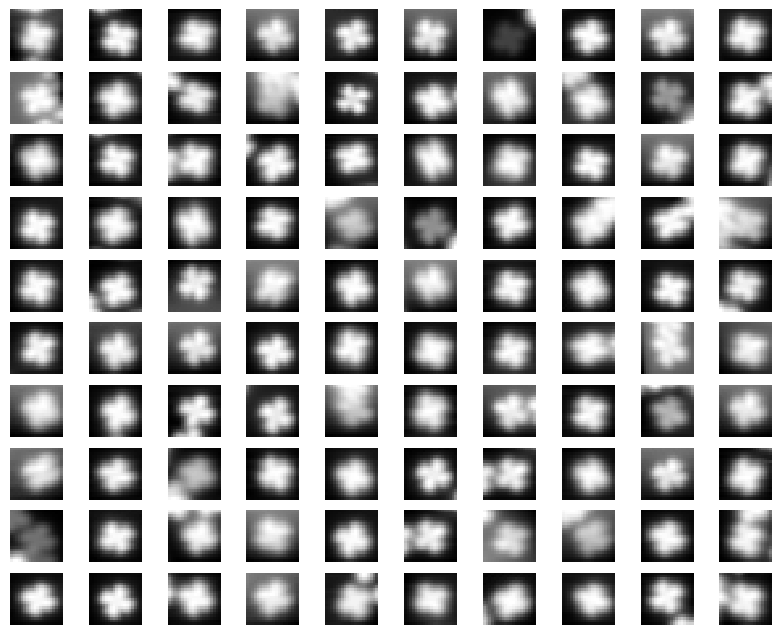

In [49]:
# plot  positive examples
fig, ax = plt.subplots(10, 10)
for ii in range(100):
    ax[ii // 10, ii % 10].imshow(stmp_pos[ii])
    ax[ii // 10, ii % 10].axis("off")

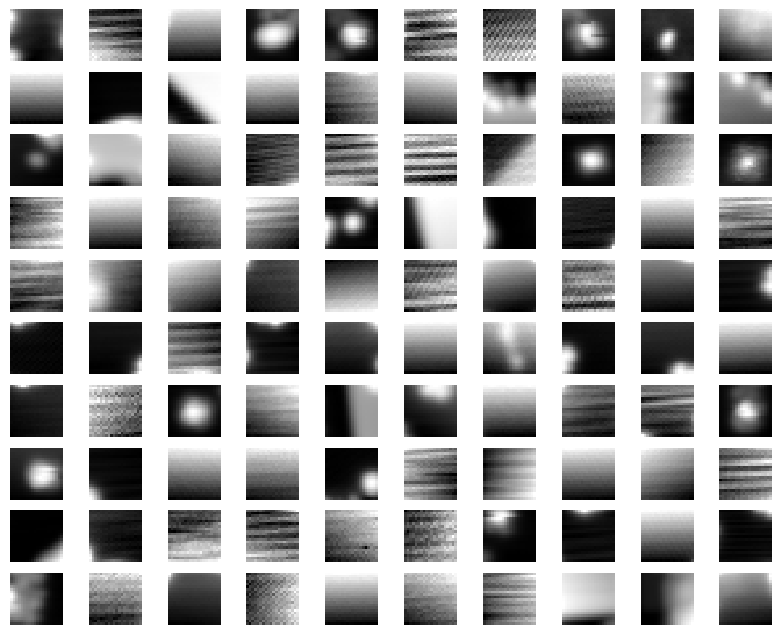

In [50]:
# plot  positive examples
fig, ax = plt.subplots(10, 10)
for ii in range(100):
    ax[ii // 10, ii % 10].imshow(stmp_neg[ii])
    ax[ii // 10, ii % 10].axis("off")

In [51]:
feat = np.concatenate((stmp_neg, stmp_pos), axis=0) #crea le features
targ = np.concatenate((np.zeros(stmp_neg.shape[0]),
                      np.ones(stmp_pos.shape[0])))

In [52]:
targ

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [53]:
feat.shape

(874, 20, 20)

In [54]:
targ.shape

(874,)

In [55]:
feat_tr, feat_te, targ_tr, targ_te = train_test_split(feat, targ, 
                                                      random_state=302, shuffle=True)
feat_tr.shape

(655, 20, 20)

In [56]:
#trasformo il training set: devo farlo perchè ho immagini in bw, mentre la fz si aspetta 3 dimensioni sempre e comunque
feat_tr = np.expand_dims(feat_tr, axis=3)
feat_te = np.expand_dims(feat_te, axis=3)
feat_tr.shape

(655, 20, 20, 1)

# Create a NN:
1. conv2d 16 neuroni
2. maxpool2d
3. conv2d 32 neuroni
4. maxpool2d
5. flatten
6. dense 64 neuroni
7. dense 2 neuroni (xkè?)

In [65]:
layer1 = keras.layers.Conv2D(16, kernel_size=(5, 5), padding="same", 
                             activation="relu", 
                             input_shape=(2 * wid, 2 * wid, 1), #needed in the first layer only
                             kernel_regularizer=keras.regularizers.l2(0.001))

layer2 = keras.layers.MaxPool2D(2)
layer3 = keras.layers.Conv2D(32, kernel_size=(5, 5), padding="same", 
                             activation="relu", 
                             kernel_regularizer=keras.regularizers.l2(0.001))
layer4 = keras.layers.MaxPool2D(2)
layer5 = keras.layers.Flatten()
layer6 = keras.layers.Dense(64, activation="relu",
                            kernel_regularizer=keras.regularizers.l2(0.001))
layer7 = keras.layers.Dense(2, activation="softmax")

layers = [layer1, layer2, layer3, layer4, layer5, layer6, layer7]
model = keras.Sequential(layers)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 20, 20, 16)        416       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 10, 10, 16)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 10, 10, 32)        12832     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 800)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                5

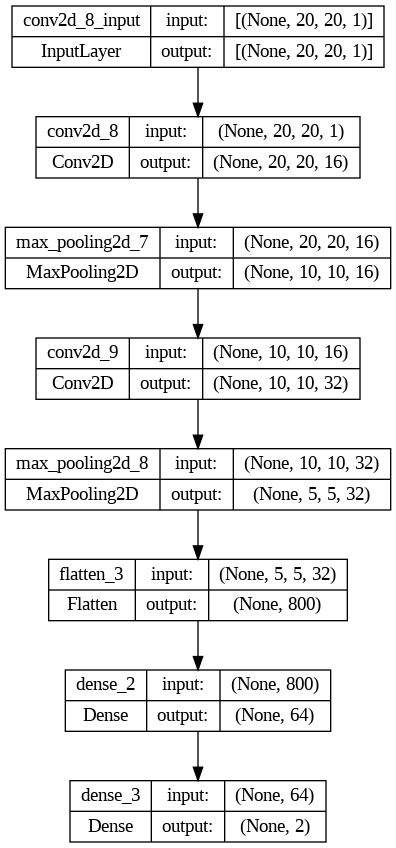

In [66]:
keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

In [68]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics='accuracy')

In [69]:
history = model.fit(feat_tr, targ_tr, epochs=50, batch_size=50, validation_split=0.1)

Epoch 1/50
12/12 [==============================] - 2s 58ms/step - loss: 0.7285 - accuracy: 0.6740 - val_loss: 0.5827 - val_accuracy: 0.9091
Epoch 2/50
12/12 [==============================] - 0s 36ms/step - loss: 0.5359 - accuracy: 0.8998 - val_loss: 0.3867 - val_accuracy: 0.9091
Epoch 3/50
12/12 [==============================] - 0s 35ms/step - loss: 0.3975 - accuracy: 0.9015 - val_loss: 0.3558 - val_accuracy: 0.9091
Epoch 4/50
12/12 [==============================] - 0s 34ms/step - loss: 0.3386 - accuracy: 0.9015 - val_loss: 0.3351 - val_accuracy: 0.8788
Epoch 5/50
12/12 [==============================] - 0s 34ms/step - loss: 0.3125 - accuracy: 0.9168 - val_loss: 0.3038 - val_accuracy: 0.8939
Epoch 6/50
12/12 [==============================] - 0s 33ms/step - loss: 0.2820 - accuracy: 0.9321 - val_loss: 0.2637 - val_accuracy: 0.9091
Epoch 7/50
12/12 [==============================] - 0s 34ms/step - loss: 0.2377 - accuracy: 0.9457 - val_loss: 0.2637 - val_accuracy: 0.9091
Epoch 8/50
12

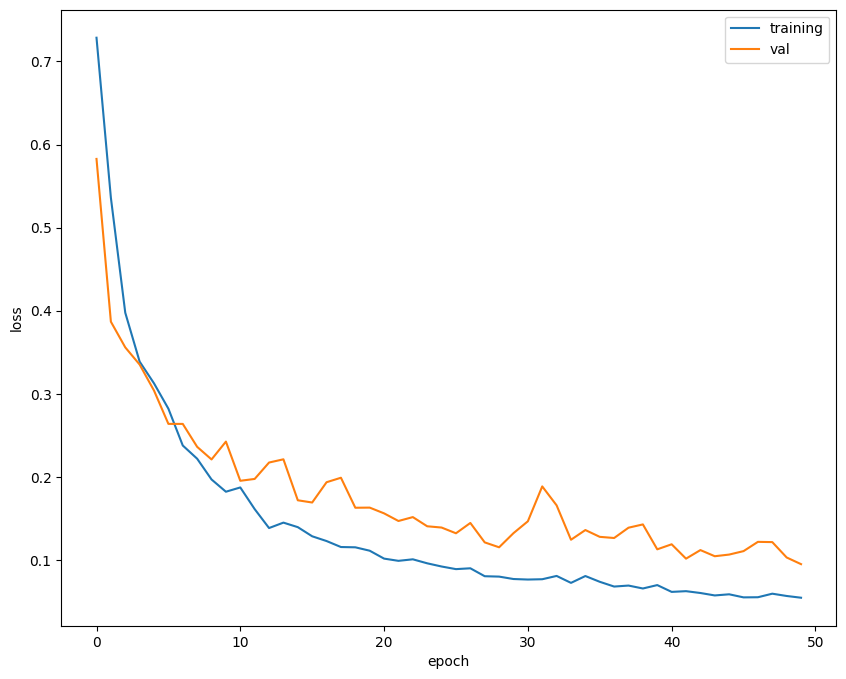

In [71]:
plt.plot(history.history["loss"], label="training")
plt.plot(history.history["val_loss"], label="val")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

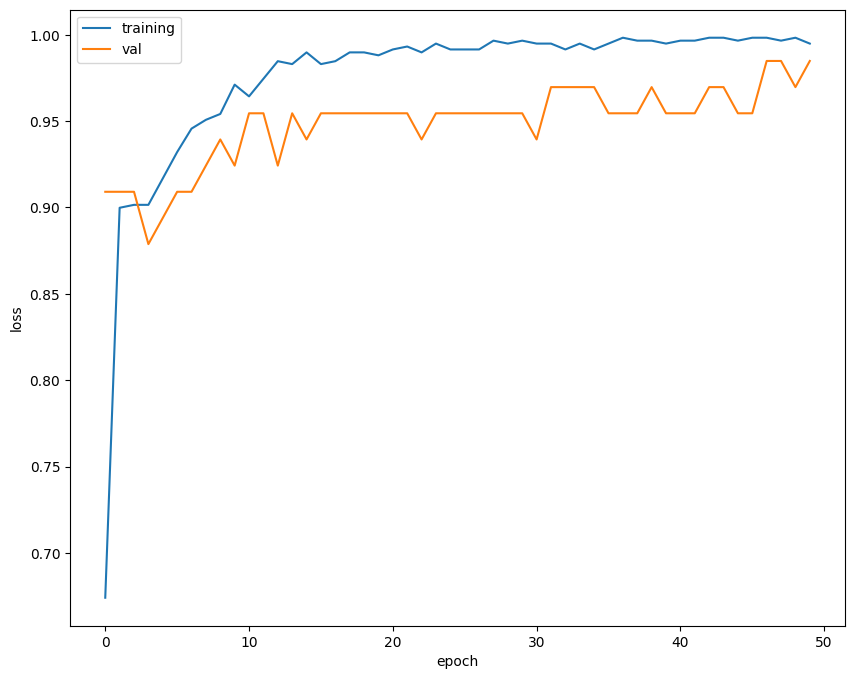

In [72]:
plt.plot(history.history["accuracy"], label="training")
plt.plot(history.history["val_accuracy"], label="val")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

In [ ]:
history.history['val_accuracy']

In [70]:
loss_tr, acc_tr = model.evaluate(feat_tr, targ_tr)
loss_te, acc_te = model.evaluate(feat_te, targ_te)
print('{:.2f}, {:.2f}, {:.2f}, {:.2f}'.format(loss_tr, acc_tr, loss_te, acc_te))

7/7 [==============================] - 0s 13ms/step - loss: 0.0897 - accuracy: 0.9863
0.06, 1.00, 0.09, 0.99
